In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc

In [ ]:
adata=sc.read_h5ad('woundintegrate.h5ad')

In [ ]:
adata_imm=adata[adata.obs['leiden'].isin(['5','6','3','7'])]

In [24]:
batches = adata_imm.obs['sample'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = adata_imm[adata_imm.obs['sample'] == batch,]  
#subset the individual dataset to the same variable genes as in MNN-correct.
alldata2 = dict()
for ds in alldata.keys():
    print(ds)
    alldata2[ds] = alldata[ds][:,var_genes]

#convert to list of AnnData objects
adata_im1 = list(alldata2.values())

# run scanorama.integrate
scanorama.integrate_scanpy(adata_im1, dimred = 50)

07-d
09-d
10-d
13-d
16-d
19-n
19b-n
19c-n
Found 3000 genes among all datasets
[[0.         0.56196581 0.83732057 0.4017094  0.15384615 0.83486239
  0.49137931 0.36324786]
 [0.         0.         0.8277512  0.48051948 0.49917898 0.28440367
  0.44396552 0.14778325]
 [0.         0.         0.         0.32535885 0.44497608 0.70642202
  0.57416268 0.59808612]
 [0.         0.         0.         0.         0.4992785  0.17431193
  0.50862069 0.27204503]
 [0.         0.         0.         0.         0.         0.40366972
  0.52586207 0.43339587]
 [0.         0.         0.         0.         0.         0.
  0.73394495 0.8440367 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.90086207]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (6, 7)
Processing datasets (5, 7)
Processing datasets (0, 2)
Processing datasets (0, 5)
Processing datasets (1, 2)
Processing datasets (5, 6)
Processing datasets (2, 5)
Processing d

In [25]:
adata_im1[0].obsm['X_scanorama'].shape

(468, 50)

In [26]:
# Get all the integrated matrices.
scanorama_int = [ad.obsm['X_scanorama'] for ad in adata_im1]

# make into one matrix.
all_s = np.concatenate(scanorama_int)
print(all_s.shape)

# add to the AnnData object
adata_imm.obsm["Scanorama"] = all_s

(5126, 50)


In [ ]:
#umap
sc.pp.neighbors(adata_imm, n_pcs =50, use_rep = "Scanorama")
sc.tl.umap(adata_imm)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP


In [ ]:
sc.pp.neighbors(adata_imm, n_pcs =50)
sc.tl.umap(adata_imm)

In [ ]:
sc.tl.leiden(adata_imm,resolution=0.4)

In [ ]:
sc.pl.umap(adata_imm, color=['leiden'],frameon=False)

In [46]:
sc.tl.rank_genes_groups(adata_imm, 'leiden', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


In [47]:
pd.DataFrame(adata_imm.uns['rank_genes_groups']['names']).head(20)

,0,1,2,3,4,5,6,7,8,9,10
0,CXCL8,HLA-DRB1,RPS12,CCL5,TPSAB1,MS4A1,NAMPT,MZB1,CCR7,GZMB,ACP5
1,FTH1,FTL,RPL13,NKG7,TPSB2,RPS8,G0S2,SSR4,TXN,JCHAIN,CTSK
2,TYROBP,C1QA,RPL13A,HLA-C,CTSG,CD37,SRGN,IGHG1,BIRC3,C12orf75,CKB
3,TIMP1,CD74,RPS3,B2M,HPGD,RPL21,S100A8,DERL3,TMSB10,TCF4,MMP9
4,SOD2,HLA-DRA,RPL10,HLA-A,HPGDS,RPS29,CXCL8,IGHG4,FSCN1,DUSP5,SPP1
5,IL1B,RNASE1,RPS27A,CST7,CPA3,CD79A,S100A9,IGKC,CCL22,TSPAN13,RGS10
6,CXCL2,CTSB,RPLP1,HLA-B,PTMA,RPLP2,SAT1,IGHG3,GPX4,IRF7,CST3
7,SAT1,AIF1,RPS6,DUSP2,LTC4S,RPL34,IFITM2,JCHAIN,ID2,LILRA4,SLC9B2
8,C15orf48,C1QC,RPS15A,RPS27,RGS13,RPS10,H3F3A,XBP1,SYNGR2,SEC61B,CD84
9,PLAUR,C1QB,RPL32,CXCR4,ANXA1,RPS6,NEAT1,IGHG2,CD83,HSP90AA1,ATP6V1E1


In [32]:
clusteranno={
    '0':'Macrophages',
    '1':'Macrophages',
    '2':'T Cells',
    '3':'T Cells',
    '4':'Mast Cells',
    '5':'B Cells',
    '6':'Macrophages',
    '7':'Plasma Cells',
    '8':'Macrophages',
    '9':'Macrophages',
    '10':'Macrophages'
}
adata_imm.obs['Cell Type']=adata_imm.obs['leiden'].map(clusteranno).astype('category')

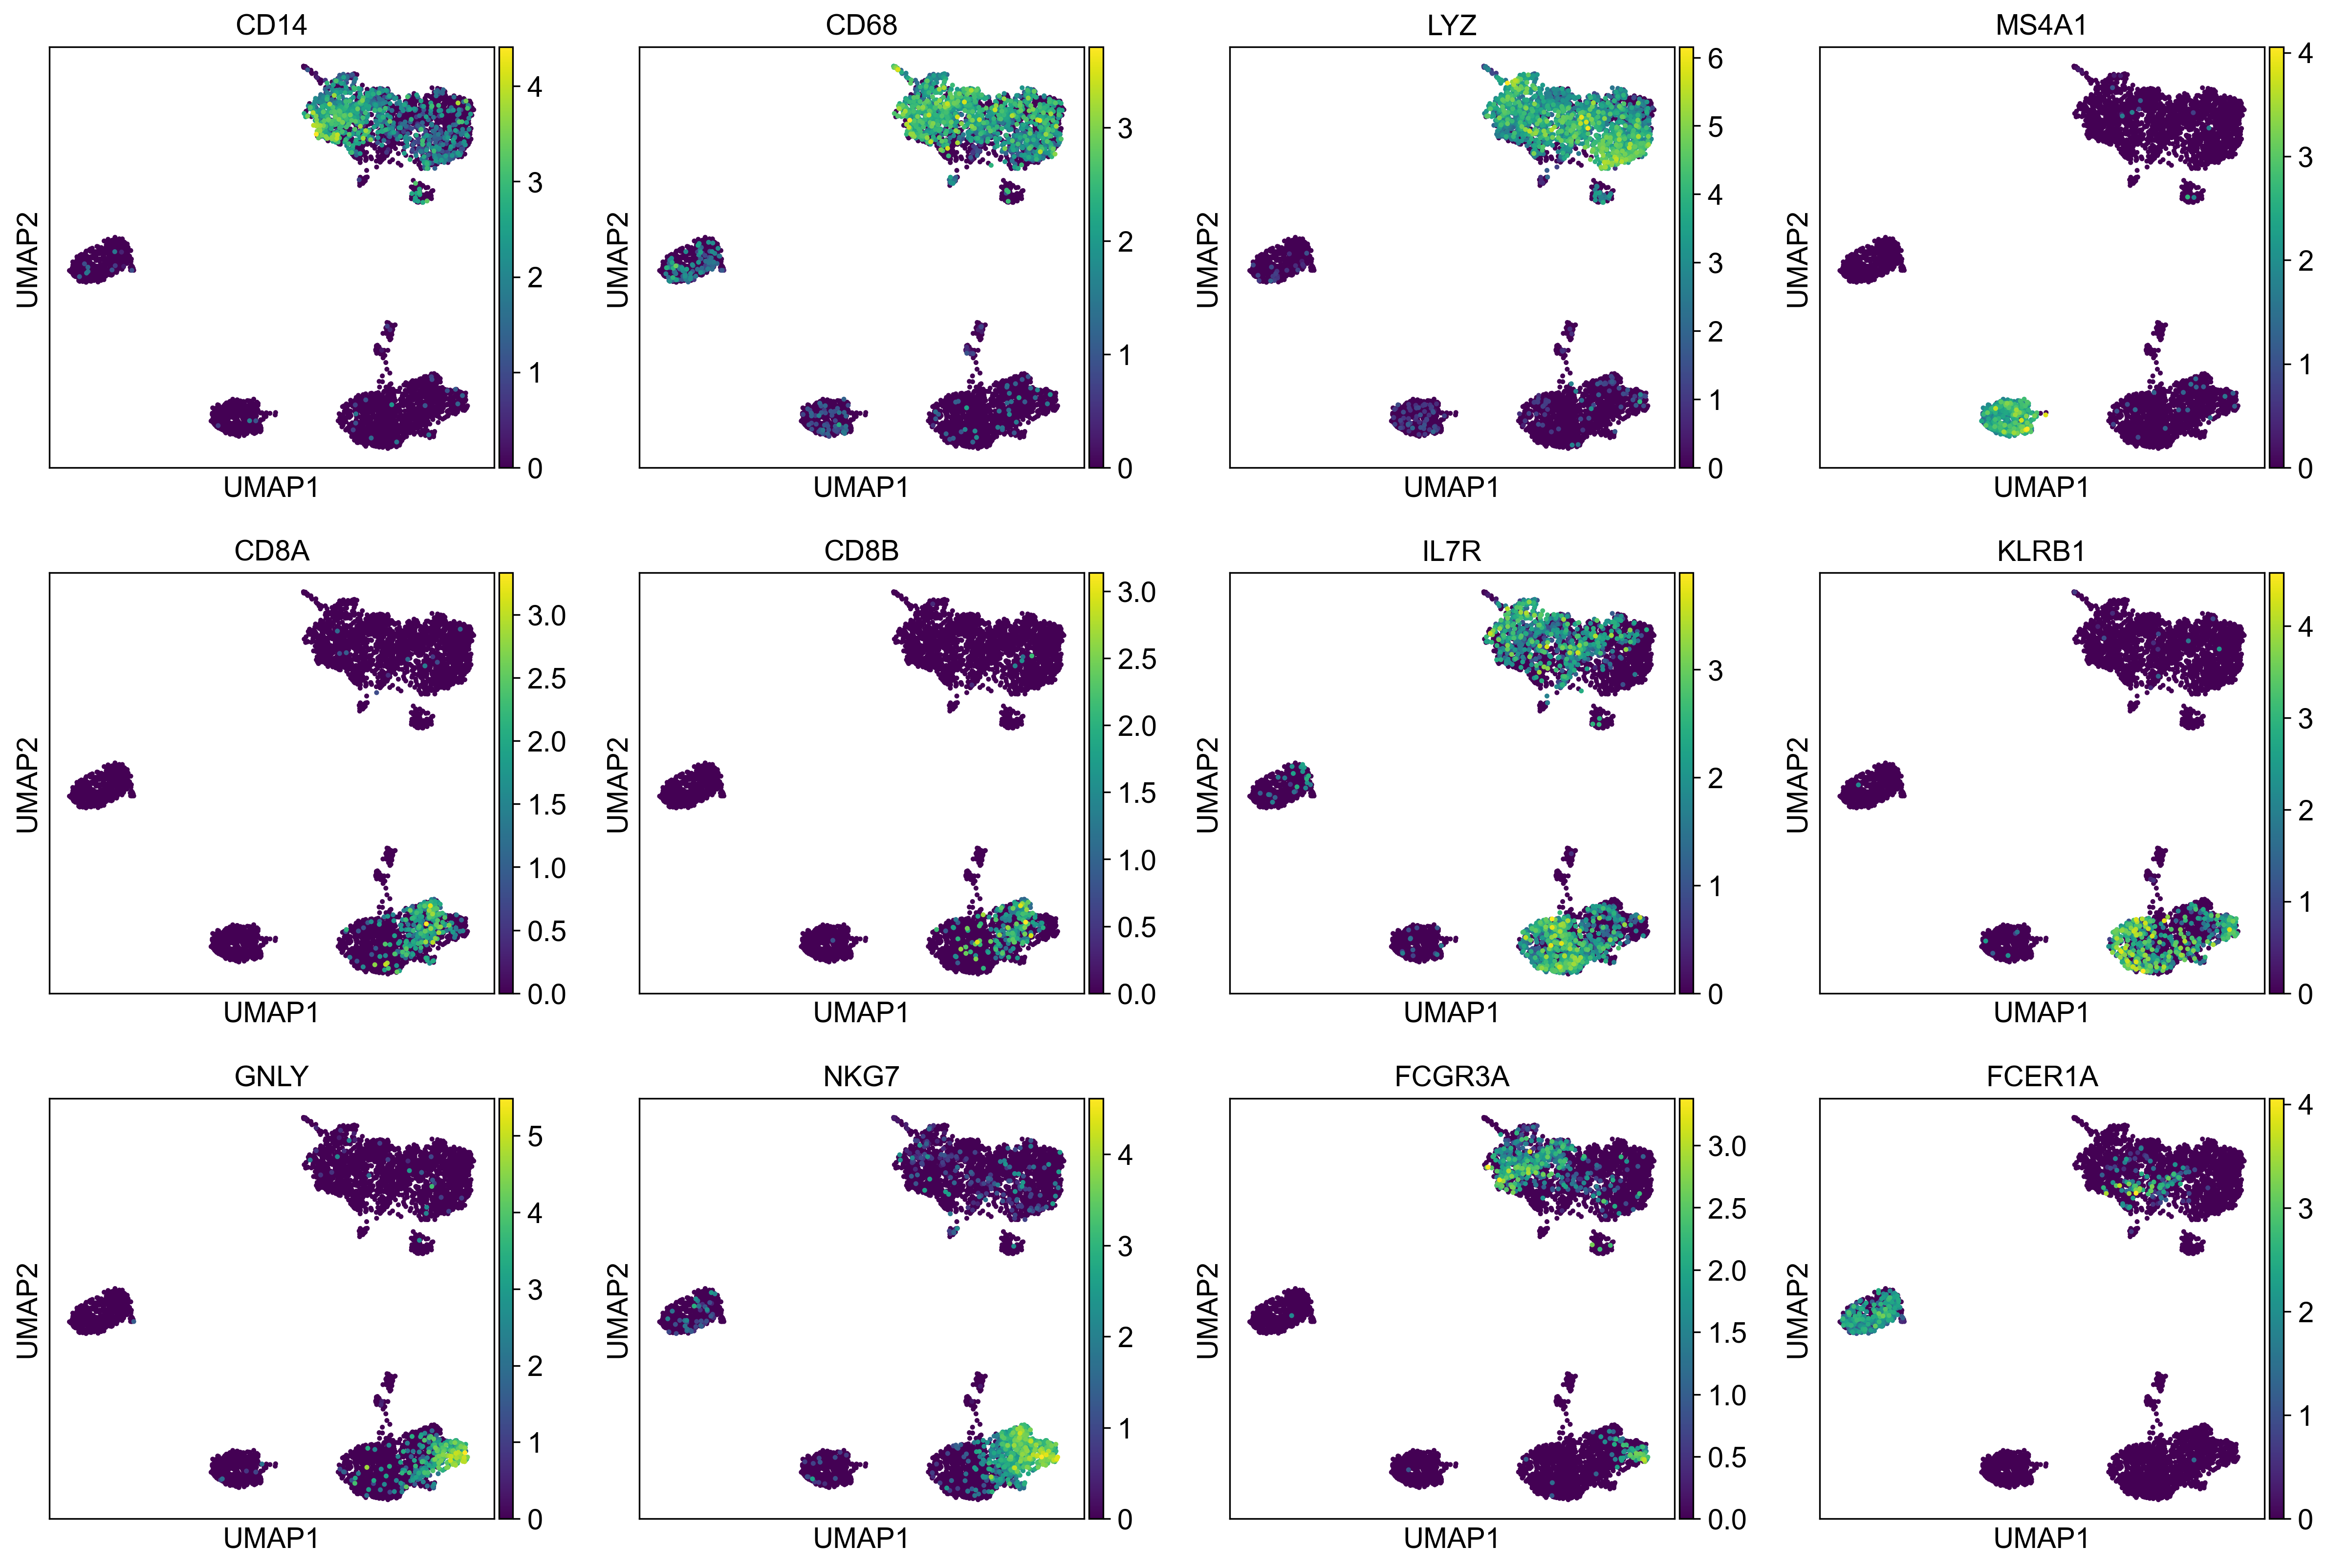

In [25]:
sc.pl.umap(adata_imm, color=['CD14','CD68','LYZ','MS4A1','CD8A','CD8B','IL7R','KLRB1','GNLY','NKG7','FCGR3A','FCER1A'])

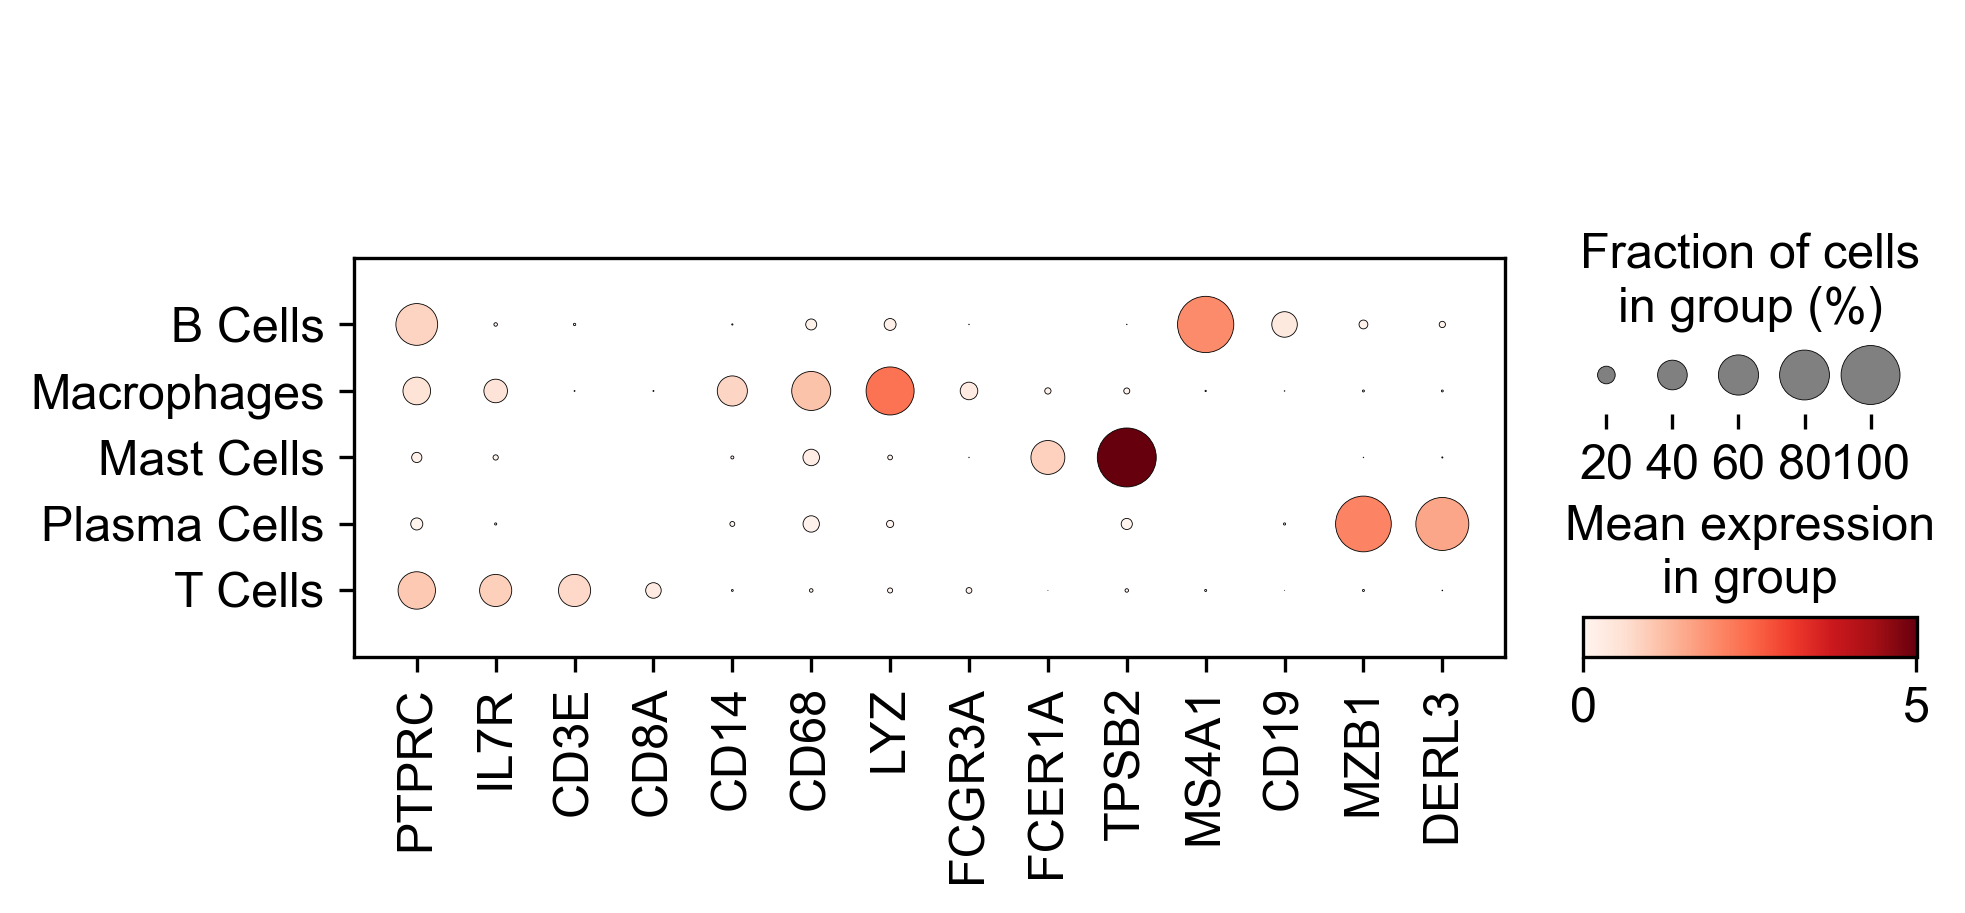

In [54]:
sc.pl.dotplot(adata_imm,['PTPRC','IL7R','CD3E','CD8A','CD14','CD68','LYZ','FCGR3A','FCER1A','TPSB2','MS4A1','CD19','MZB1','DERL3'],groupby='Cell Type')

In [33]:
pd.crosstab(adata_imm.obs['condition'],adata_imm.obs['Cell Type'])

Cell Type,B Cells,Macrophages,Mast Cells,Plasma Cells,T Cells
condition,,,,,
diabetic,504,1593,427,82,1113
non diabetic,12,745,152,1,497


In [34]:
pd.crosstab(adata_imm.obs['sample'],adata_imm.obs['Cell Type'])

Cell Type,B Cells,Macrophages,Mast Cells,Plasma Cells,T Cells
sample,,,,,
07-d,0,304,14,0,150
09-d,2,141,63,72,331
10-d,0,39,10,3,157
13-d,0,304,336,1,52
16-d,502,805,4,6,423
19-n,0,44,6,0,59
19b-n,0,102,83,1,46
19c-n,12,599,63,0,392


C:\Users\quanp\miniconda3\Lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


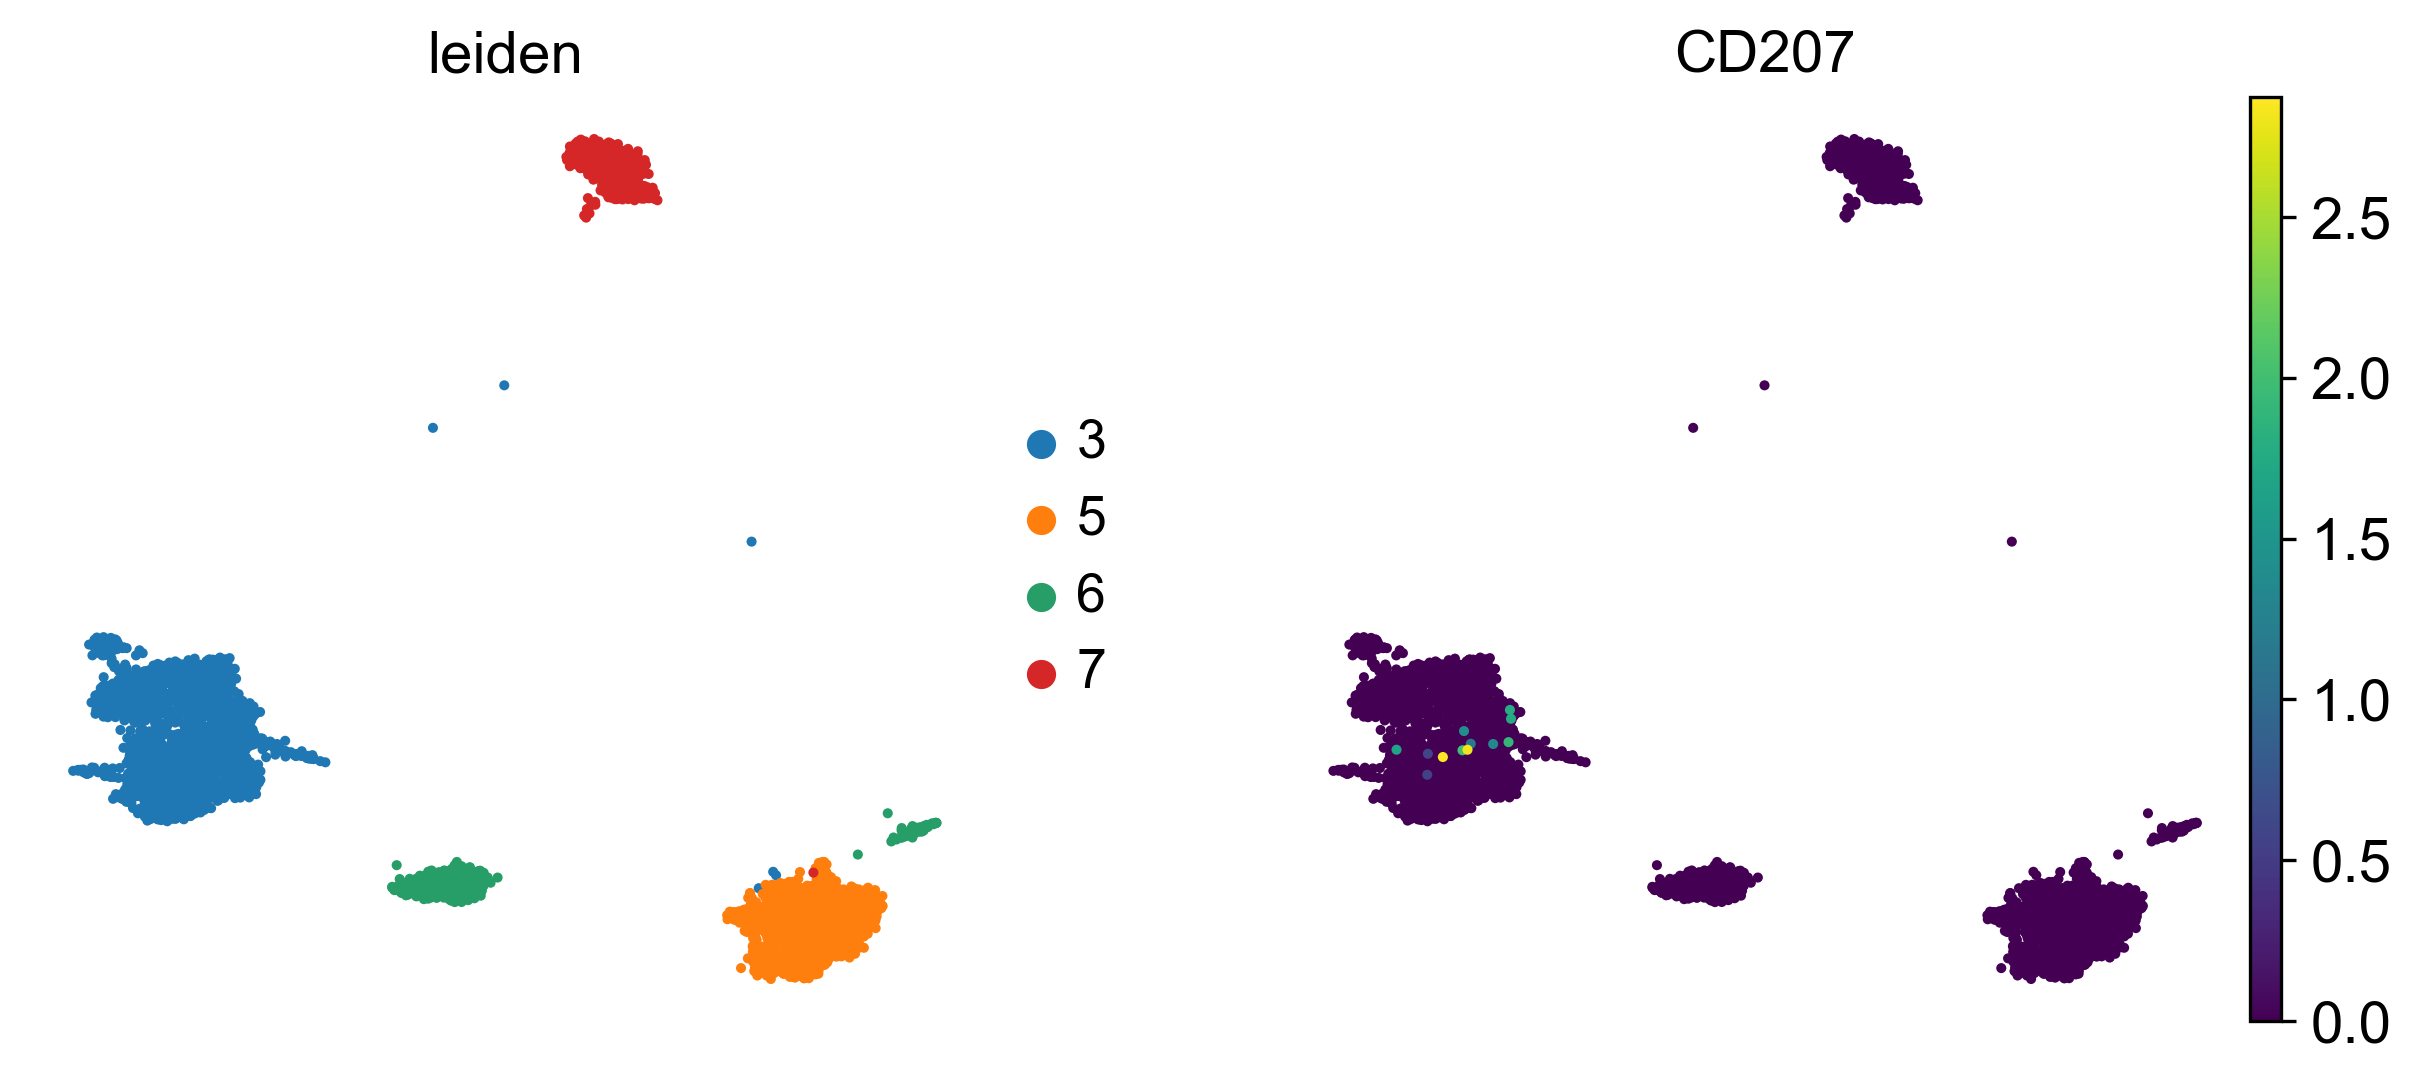

In [23]:
sc.pl.umap(adata_imm, color=['leiden','CD207'],frameon=False)

In [77]:
adata_nkc=adata_imm[adata_imm.obs['leiden'].isin(['3'])]

In [13]:
adata_mac=adata_imm[adata_imm.obs['leiden'].isin(['0','2'])]

In [79]:
adata_mast=adata_imm[adata_imm.obs['leiden'].isin(['3'])]

In [14]:
batches = adata_mac.obs['sample'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = adata_mac[adata_mac.obs['sample'] == batch,]  
#subset the individual dataset to the same variable genes as in MNN-correct.
alldata2 = dict()
for ds in alldata.keys():
    print(ds)
    alldata2[ds] = alldata[ds][:,var_genes]

#convert to list of AnnData objects
adata_mac1 = list(alldata2.values())

# run scanorama.integrate
scanorama.integrate_scanpy(adata_mac1, dimred = 50)

07-d
09-d
10-d
13-d
16-d
19-n
19b-n
19c-n
Found 3000 genes among all datasets
[[0.         0.88571429 0.89473684 0.61513158 0.27631579 0.76190476
  0.62376238 0.41776316]
 [0.         0.         0.60526316 0.70714286 0.72857143 0.16666667
  0.42574257 0.15      ]
 [0.         0.         0.         0.65789474 0.60526316 0.42857143
  0.5        0.47368421]
 [0.         0.         0.         0.         0.8779661  0.54761905
  0.42574257 0.45177665]
 [0.         0.         0.         0.         0.         0.71428571
  0.75247525 0.61928934]
 [0.         0.         0.         0.         0.         0.
  0.66666667 0.83333333]
 [0.         0.         0.         0.         0.         0.
  0.         0.86138614]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (0, 2)
Processing datasets (0, 1)
Processing datasets (3, 4)
Processing datasets (6, 7)
Processing datasets (5, 7)
Processing datasets (0, 5)
Processing datasets (4, 6)
Processing d

In [15]:
adata_mac1[0].obsm['X_scanorama'].shape

(304, 50)

In [16]:
# Get all the integrated matrices.
scanorama_int = [ad.obsm['X_scanorama'] for ad in adata_mac1]

# make into one matrix.
all_s = np.concatenate(scanorama_int)
print(all_s.shape)

# add to the AnnData object
adata_mac.obsm["Scanorama"] = all_s

(2179, 50)


In [17]:
#umap
sc.pp.neighbors(adata_mac, n_pcs =50, use_rep = "Scanorama")
sc.tl.umap(adata_mac)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


In [18]:
sc.tl.leiden(adata_mac,resolution=0.4)

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


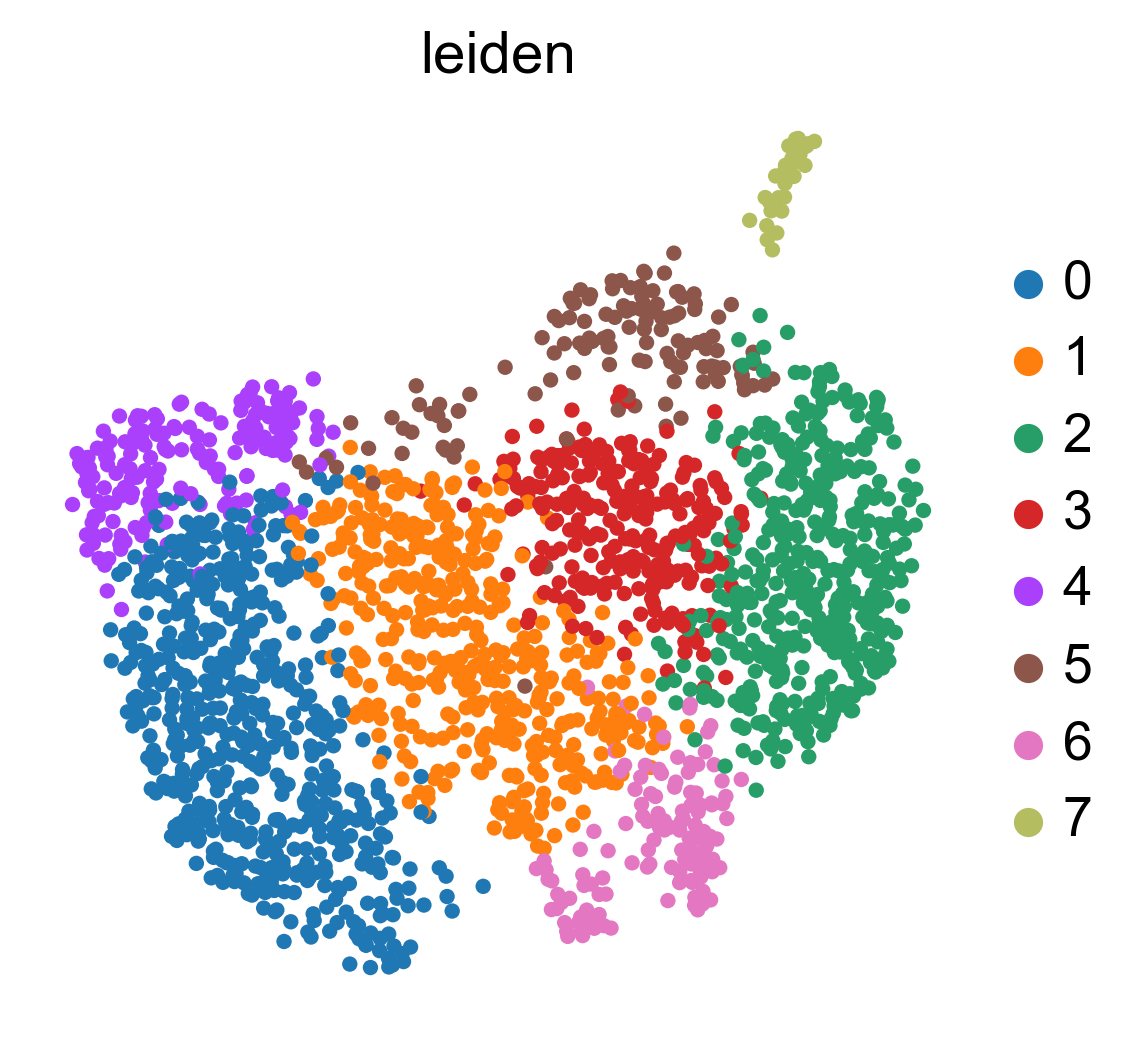

In [17]:
sc.pl.umap(adata_mac,color=['leiden'],frameon=False)

In [59]:
sc.tl.rank_genes_groups(adata_mac, 'leiden', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


In [60]:
pd.DataFrame(adata_mac.uns['rank_genes_groups']['names']).head(15)

,0,1,2,3,4
0,C1QA,TIMP1,HLA-DPB1,MALAT1,CTSK
1,C1QB,IL1B,HLA-DPA1,HSPA1A,MMP9
2,RNASE1,S100A8,HLA-DRA,HSPA1B,ACP5
3,C1QC,S100A12,CD74,HSP90AA1,CST3
4,LGMN,G0S2,RPL8,HSPB1,RPS18
5,CTSD,BCL2A1,VIM,DNAJB1,RGS10
6,PSAP,CXCL8,COTL1,UBC,SPP1
7,CTSB,EIF1,TMSB4X,HSP90AB1,CKB
8,PLTP,RPL39,CST7,HSPA6,CD84
9,CD74,SRGN,RPS2,UBB,RPLP0


In [15]:
adata_mac = sc.read_h5ad("macrophages.h5ad")

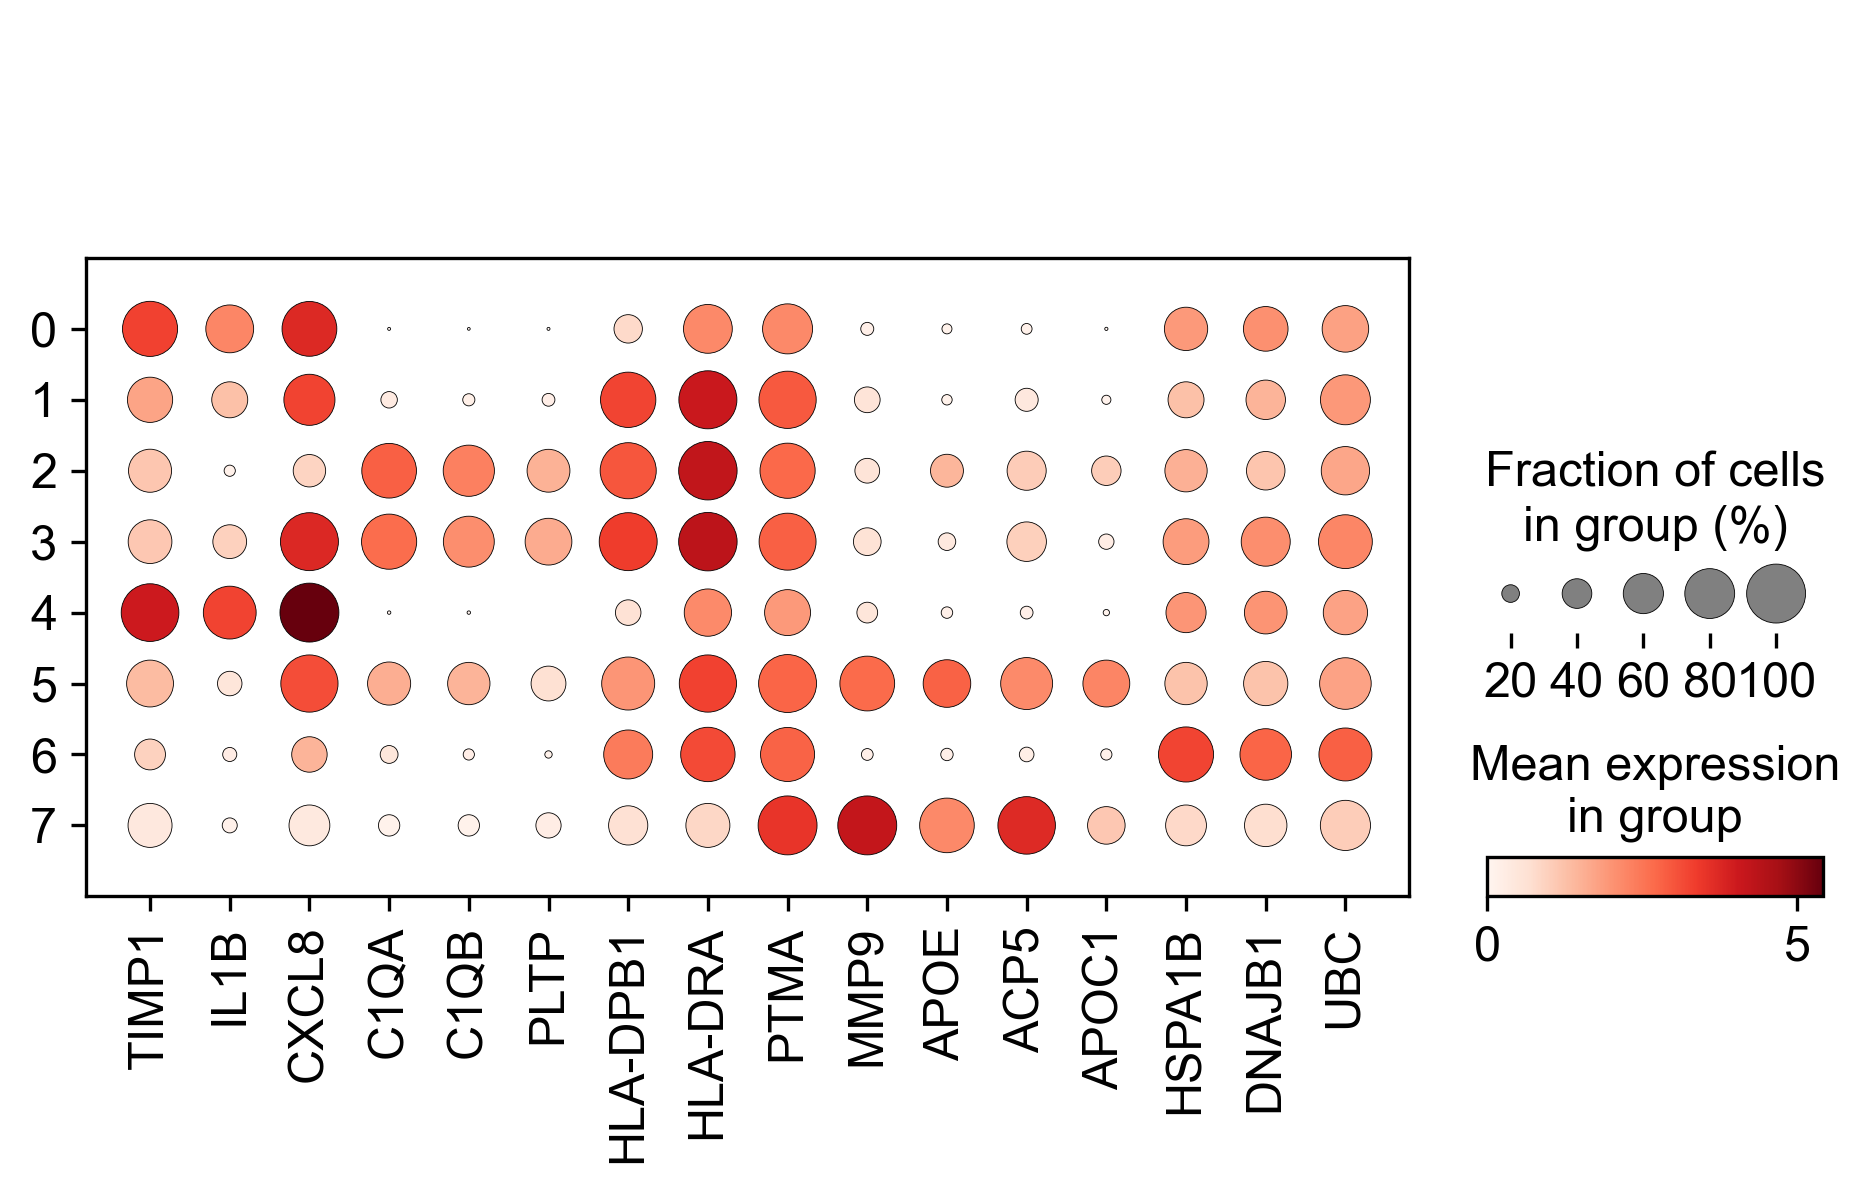

In [16]:
sc.pl.dotplot(adata_mac,var_names=['TIMP1','IL1B','CXCL8','C1QA','C1QB','PLTP','HLA-DPB1','HLA-DRA','PTMA','MMP9','APOE','ACP5','APOC1','HSPA1B','DNAJB1','UBC'],groupby='leiden')

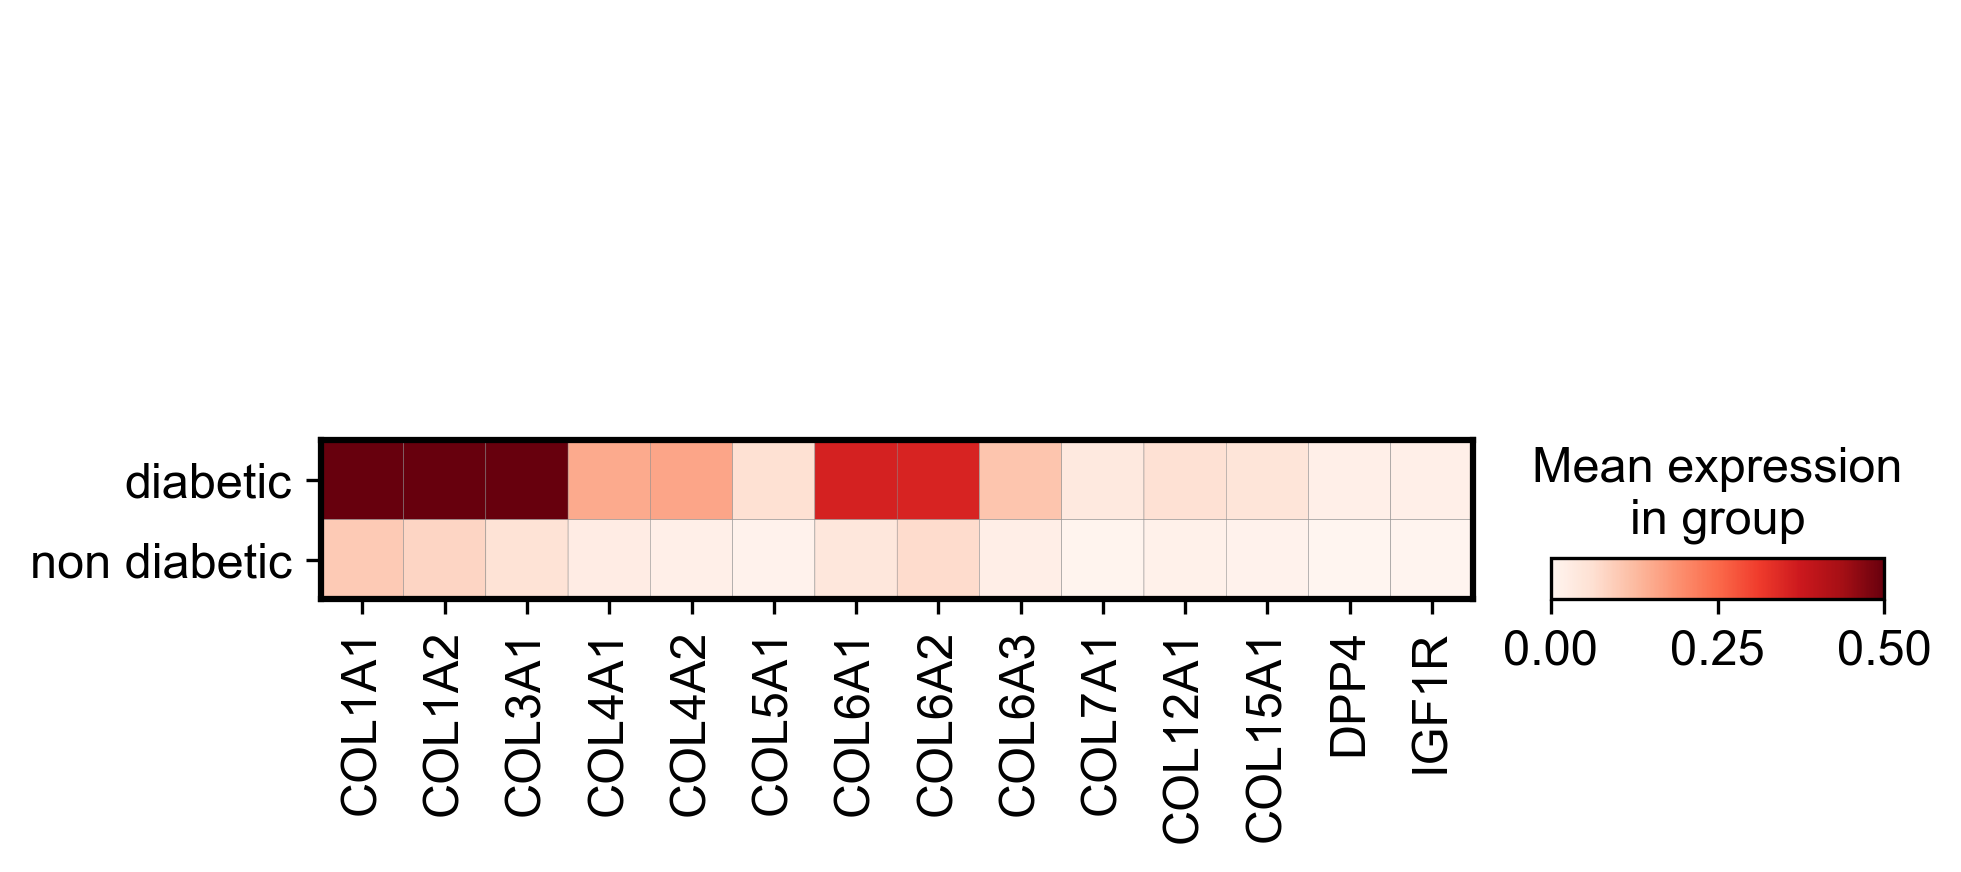

In [21]:
sc.pl.matrixplot(adata_mac,var_names =['COL1A1','COL1A2','COL3A1','COL4A1','COL4A2','COL5A1','COL6A1','COL6A2','COL6A3','COL7A1','COL12A1','COL15A1','DPP4','IGF1R'],groupby='condition',cmap='Reds',vmax=0.5)